In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
#n_units=512
n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((73*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(394, 100, 100)


In [17]:
print(y_test.shape)

(44, 100, 100)


In [18]:
print(x_train.shape)

(394, 15, 1)


In [19]:
print(x_test.shape)

(44, 15, 1)


In [20]:
theta_train.shape

(394,)

In [21]:
tsr_train.shape

(394,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 1024)             3072      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 1024)             1049600   
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 1024)             1049600   
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((394, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((44, 2, 1))

In [28]:
tsr_theta_train.shape

(394, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 4ms/step - loss: 0.0209 - rmse: 0.1444
Epoch 2/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1390
Epoch 3/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 4/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1384
Epoch 5/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 6/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 7/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 8/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1377
Epoch 9/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 10/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1077
Epoch 168/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1079
Epoch 169/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.1069
Epoch 170/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1056
Epoch 171/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1047
Epoch 172/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1041
Epoch 173/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.1031
Epoch 174/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.1032
Epoch 175/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1025
Epoch 176/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1020
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 332/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 333/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 334/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 335/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 336/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 337/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 338/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 339/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 340/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 4.3007e-04 - rmse: 0.0207
Epoch 493/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4002e-04 - rmse: 0.0210
Epoch 494/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3623e-04 - rmse: 0.0209
Epoch 495/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4192e-04 - rmse: 0.0210
Epoch 496/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4794e-04 - rmse: 0.0212
Epoch 497/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4372e-04 - rmse: 0.0211
Epoch 498/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5804e-04 - rmse: 0.0214
Epoch 499/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2843e-04 - rmse: 0.0207
Epoch 500/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9122e-04 - rmse: 0.0198
Epoch 501/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8915e-04 -

10/10 [==============================] - 0s 4ms/step - loss: 2.7541e-04 - rmse: 0.0166
Epoch 651/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6172e-04 - rmse: 0.0162
Epoch 652/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4950e-04 - rmse: 0.0158
Epoch 653/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5899e-04 - rmse: 0.0161
Epoch 654/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4742e-04 - rmse: 0.0157
Epoch 655/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0654e-04 - rmse: 0.0144
Epoch 656/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8637e-04 - rmse: 0.0137
Epoch 657/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8291e-04 - rmse: 0.0135
Epoch 658/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1198e-04 - rmse: 0.0146
Epoch 659/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4726e-04 -

10/10 [==============================] - 0s 4ms/step - loss: 1.2949e-04 - rmse: 0.0114
Epoch 809/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2360e-04 - rmse: 0.0111
Epoch 810/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2985e-04 - rmse: 0.0114
Epoch 811/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2335e-04 - rmse: 0.0111
Epoch 812/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0872e-04 - rmse: 0.0104
Epoch 813/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1154e-04 - rmse: 0.0106
Epoch 814/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2583e-04 - rmse: 0.0112
Epoch 815/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2774e-04 - rmse: 0.0113
Epoch 816/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3823e-04 - rmse: 0.0118
Epoch 817/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4745e-04 -

10/10 [==============================] - 0s 4ms/step - loss: 1.1125e-04 - rmse: 0.0105
Epoch 967/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7518e-05 - rmse: 0.0099
Epoch 968/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0168e-04 - rmse: 0.0101
Epoch 969/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1699e-04 - rmse: 0.0108
Epoch 970/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2347e-04 - rmse: 0.0111
Epoch 971/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7197e-04 - rmse: 0.0131
Epoch 972/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8851e-04 - rmse: 0.0137
Epoch 973/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8890e-04 - rmse: 0.0170
Epoch 974/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3564e-04 - rmse: 0.0183
Epoch 975/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2913e-04 -

10/10 [==============================] - 0s 4ms/step - loss: 1.4157e-04 - rmse: 0.0119
Epoch 1124/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0557e-04 - rmse: 0.0103
Epoch 1125/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9925e-05 - rmse: 0.0089
Epoch 1126/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9924e-05 - rmse: 0.0095
Epoch 1127/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9944e-04 - rmse: 0.0141
Epoch 1128/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2712e-04 - rmse: 0.0230
Epoch 1129/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9968e-04 - rmse: 0.0173
Epoch 1130/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9668e-04 - rmse: 0.0140
Epoch 1131/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4338e-04 - rmse: 0.0120
Epoch 1132/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8

10/10 [==============================] - 0s 4ms/step - loss: 9.0763e-05 - rmse: 0.0095
Epoch 1281/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5786e-05 - rmse: 0.0093
Epoch 1282/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0014e-05 - rmse: 0.0084
Epoch 1283/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1022e-04 - rmse: 0.0105
Epoch 1284/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9611e-05 - rmse: 0.0095
Epoch 1285/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0129e-04 - rmse: 0.0101
Epoch 1286/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0330e-05 - rmse: 0.0090
Epoch 1287/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5766e-05 - rmse: 0.0087
Epoch 1288/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2069e-05 - rmse: 0.0091
Epoch 1289/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9

10/10 [==============================] - 0s 4ms/step - loss: 9.8075e-05 - rmse: 0.0099
Epoch 1437/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2407e-04 - rmse: 0.0111
Epoch 1438/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1667e-04 - rmse: 0.0108
Epoch 1439/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2840e-04 - rmse: 0.0113
Epoch 1440/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5422e-04 - rmse: 0.0124
Epoch 1441/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7666e-04 - rmse: 0.0166
Epoch 1442/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6309e-04 - rmse: 0.0276
Epoch 1443/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3697e-04 - rmse: 0.0271
Epoch 1444/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2148e-04 - rmse: 0.0205
Epoch 1445/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1

10/10 [==============================] - 0s 4ms/step - loss: 2.0390e-04 - rmse: 0.0143
Epoch 1593/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2893e-04 - rmse: 0.0114
Epoch 1594/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0923e-04 - rmse: 0.0105
Epoch 1595/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1543e-05 - rmse: 0.0090
Epoch 1596/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1507e-05 - rmse: 0.0085
Epoch 1597/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7639e-05 - rmse: 0.0069
Epoch 1598/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0211e-05 - rmse: 0.0071
Epoch 1599/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5575e-05 - rmse: 0.0068
Epoch 1600/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2668e-05 - rmse: 0.0073
Epoch 1601/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9

10/10 [==============================] - 0s 4ms/step - loss: 2.4643e-05 - rmse: 0.0050
Epoch 1749/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0475e-05 - rmse: 0.0055
Epoch 1750/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2560e-05 - rmse: 0.0057
Epoch 1751/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8806e-05 - rmse: 0.0054
Epoch 1752/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5214e-05 - rmse: 0.0050
Epoch 1753/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5541e-05 - rmse: 0.0060
Epoch 1754/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5335e-05 - rmse: 0.0087
Epoch 1755/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0950e-05 - rmse: 0.0078
Epoch 1756/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.2989e-05 - rmse: 0.0079
Epoch 1757/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3

10/10 [==============================] - 0s 4ms/step - loss: 3.0340e-05 - rmse: 0.0055
Epoch 1905/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9620e-05 - rmse: 0.0063
Epoch 1906/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4508e-05 - rmse: 0.0092
Epoch 1907/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1794e-05 - rmse: 0.0085
Epoch 1908/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6171e-05 - rmse: 0.0068
Epoch 1909/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7725e-05 - rmse: 0.0069
Epoch 1910/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5670e-05 - rmse: 0.0068
Epoch 1911/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.2072e-05 - rmse: 0.0085
Epoch 1912/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3329e-04 - rmse: 0.0153
Epoch 1913/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1

10/10 [==============================] - 0s 4ms/step - loss: 4.6471e-05 - rmse: 0.0068
Epoch 2061/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0079e-05 - rmse: 0.0055
Epoch 2062/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7879e-05 - rmse: 0.0053
Epoch 2063/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3292e-05 - rmse: 0.0048
Epoch 2064/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3370e-05 - rmse: 0.0048
Epoch 2065/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1668e-05 - rmse: 0.0047
Epoch 2066/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6987e-05 - rmse: 0.0041
Epoch 2067/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2889e-05 - rmse: 0.0036
Epoch 2068/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9015e-06 - rmse: 0.0031
Epoch 2069/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1

10/10 [==============================] - 0s 4ms/step - loss: 1.6748e-05 - rmse: 0.0041
Epoch 2217/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7069e-05 - rmse: 0.0041
Epoch 2218/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8061e-05 - rmse: 0.0042
Epoch 2219/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0629e-05 - rmse: 0.0045
Epoch 2220/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3741e-05 - rmse: 0.0049
Epoch 2221/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7793e-05 - rmse: 0.0042
Epoch 2222/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3944e-05 - rmse: 0.0037
Epoch 2223/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0768e-05 - rmse: 0.0033
Epoch 2224/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4786e-06 - rmse: 0.0031
Epoch 2225/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0

10/10 [==============================] - 0s 4ms/step - loss: 1.9670e-05 - rmse: 0.0044
Epoch 2373/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0901e-05 - rmse: 0.0046
Epoch 2374/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7782e-05 - rmse: 0.0042
Epoch 2375/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5385e-05 - rmse: 0.0039
Epoch 2376/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9019e-05 - rmse: 0.0054
Epoch 2377/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7060e-05 - rmse: 0.0076
Epoch 2378/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4057e-05 - rmse: 0.0097
Epoch 2379/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0264e-04 - rmse: 0.0101
Epoch 2380/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2356e-04 - rmse: 0.0111
Epoch 2381/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5

10/10 [==============================] - 0s 4ms/step - loss: 5.4934e-05 - rmse: 0.0074
Epoch 2529/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6902e-05 - rmse: 0.0061
Epoch 2530/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0730e-05 - rmse: 0.0064
Epoch 2531/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2761e-05 - rmse: 0.0057
Epoch 2532/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0162e-05 - rmse: 0.0055
Epoch 2533/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0722e-05 - rmse: 0.0064
Epoch 2534/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5302e-05 - rmse: 0.0059
Epoch 2535/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7304e-05 - rmse: 0.0061
Epoch 2536/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4616e-05 - rmse: 0.0059
Epoch 2537/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3

10/10 [==============================] - 0s 4ms/step - loss: 6.3772e-05 - rmse: 0.0080
Epoch 2685/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5152e-05 - rmse: 0.0074
Epoch 2686/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3378e-05 - rmse: 0.0073
Epoch 2687/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3269e-05 - rmse: 0.0073
Epoch 2688/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2632e-05 - rmse: 0.0073
Epoch 2689/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5825e-05 - rmse: 0.0081
Epoch 2690/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7074e-05 - rmse: 0.0088
Epoch 2691/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6608e-04 - rmse: 0.0129
Epoch 2692/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5265e-04 - rmse: 0.0159
Epoch 2693/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5

10/10 [==============================] - 0s 4ms/step - loss: 8.2289e-06 - rmse: 0.0029
Epoch 2841/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1961e-06 - rmse: 0.0027
Epoch 2842/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9002e-06 - rmse: 0.0026
Epoch 2843/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0977e-06 - rmse: 0.0027
Epoch 2844/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4353e-06 - rmse: 0.0023
Epoch 2845/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8566e-06 - rmse: 0.0024
Epoch 2846/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1503e-06 - rmse: 0.0025
Epoch 2847/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.3893e-06 - rmse: 0.0025
Epoch 2848/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0908e-06 - rmse: 0.0027
Epoch 2849/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4

10/10 [==============================] - 0s 4ms/step - loss: 1.2435e-05 - rmse: 0.0035
Epoch 2997/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1201e-05 - rmse: 0.0033
Epoch 2998/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4044e-05 - rmse: 0.0037
Epoch 2999/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1039e-05 - rmse: 0.0046
Epoch 3000/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2086e-05 - rmse: 0.0047
Epoch 3001/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0732e-05 - rmse: 0.0055
Epoch 3002/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0037e-05 - rmse: 0.0045
Epoch 3003/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6860e-05 - rmse: 0.0041
Epoch 3004/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4897e-05 - rmse: 0.0039
Epoch 3005/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9

10/10 [==============================] - 0s 4ms/step - loss: 3.8349e-06 - rmse: 0.0020
Epoch 3154/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0447e-06 - rmse: 0.0020
Epoch 3155/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3169e-06 - rmse: 0.0021
Epoch 3156/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9586e-06 - rmse: 0.0020
Epoch 3157/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3033e-06 - rmse: 0.0018
Epoch 3158/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4073e-06 - rmse: 0.0018
Epoch 3159/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.7506e-06 - rmse: 0.0019
Epoch 3160/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5143e-06 - rmse: 0.0019
Epoch 3161/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1317e-06 - rmse: 0.0018
Epoch 3162/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3

10/10 [==============================] - 0s 4ms/step - loss: 7.4938e-06 - rmse: 0.0027
Epoch 3310/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9541e-06 - rmse: 0.0030
Epoch 3311/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9589e-06 - rmse: 0.0032
Epoch 3312/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1325e-05 - rmse: 0.0034
Epoch 3313/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1042e-05 - rmse: 0.0033
Epoch 3314/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3360e-06 - rmse: 0.0029
Epoch 3315/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8017e-06 - rmse: 0.0026
Epoch 3316/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8158e-06 - rmse: 0.0030
Epoch 3317/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0155e-05 - rmse: 0.0032
Epoch 3318/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9

10/10 [==============================] - 0s 4ms/step - loss: 2.4161e-06 - rmse: 0.0016
Epoch 3466/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5488e-06 - rmse: 0.0016
Epoch 3467/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1090e-06 - rmse: 0.0018
Epoch 3468/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9600e-06 - rmse: 0.0017
Epoch 3469/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8225e-06 - rmse: 0.0017
Epoch 3470/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0613e-06 - rmse: 0.0017
Epoch 3471/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2992e-06 - rmse: 0.0018
Epoch 3472/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6785e-06 - rmse: 0.0022
Epoch 3473/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8125e-06 - rmse: 0.0022
Epoch 3474/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4

10/10 [==============================] - 0s 4ms/step - loss: 2.9413e-06 - rmse: 0.0017
Epoch 3622/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2663e-06 - rmse: 0.0018
Epoch 3623/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2526e-06 - rmse: 0.0018
Epoch 3624/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5833e-06 - rmse: 0.0019
Epoch 3625/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8398e-06 - rmse: 0.0017
Epoch 3626/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9969e-06 - rmse: 0.0017
Epoch 3627/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0877e-06 - rmse: 0.0020
Epoch 3628/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.3183e-06 - rmse: 0.0025
Epoch 3629/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1590e-06 - rmse: 0.0023
Epoch 3630/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0

10/10 [==============================] - 0s 4ms/step - loss: 1.8270e-05 - rmse: 0.0043
Epoch 3778/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4891e-05 - rmse: 0.0039
Epoch 3779/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0402e-05 - rmse: 0.0045
Epoch 3780/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3188e-05 - rmse: 0.0048
Epoch 3781/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7781e-05 - rmse: 0.0053
Epoch 3782/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2659e-05 - rmse: 0.0057
Epoch 3783/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7506e-05 - rmse: 0.0094
Epoch 3784/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.3979e-05 - rmse: 0.0097
Epoch 3785/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3470e-05 - rmse: 0.0091
Epoch 3786/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7

10/10 [==============================] - 0s 4ms/step - loss: 2.7441e-06 - rmse: 0.0017
Epoch 3934/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9320e-06 - rmse: 0.0017
Epoch 3935/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6935e-06 - rmse: 0.0019
Epoch 3936/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5384e-06 - rmse: 0.0019
Epoch 3937/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0313e-06 - rmse: 0.0017
Epoch 3938/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1602e-06 - rmse: 0.0018
Epoch 3939/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6613e-06 - rmse: 0.0019
Epoch 3940/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0807e-06 - rmse: 0.0018
Epoch 3941/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0942e-06 - rmse: 0.0018
Epoch 3942/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5

10/10 [==============================] - 0s 4ms/step - loss: 1.9598e-06 - rmse: 0.0014
Epoch 4090/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9891e-06 - rmse: 0.0014
Epoch 4091/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2349e-06 - rmse: 0.0015
Epoch 4092/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6260e-06 - rmse: 0.0016
Epoch 4093/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6603e-06 - rmse: 0.0016
Epoch 4094/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7626e-06 - rmse: 0.0017
Epoch 4095/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1762e-06 - rmse: 0.0018
Epoch 4096/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3494e-06 - rmse: 0.0018
Epoch 4097/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2994e-06 - rmse: 0.0018
Epoch 4098/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4

10/10 [==============================] - 0s 4ms/step - loss: 4.5552e-06 - rmse: 0.0021
Epoch 4246/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1023e-06 - rmse: 0.0020
Epoch 4247/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6091e-06 - rmse: 0.0021
Epoch 4248/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0798e-06 - rmse: 0.0020
Epoch 4249/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0034e-06 - rmse: 0.0020
Epoch 4250/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3345e-06 - rmse: 0.0018
Epoch 4251/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5861e-06 - rmse: 0.0019
Epoch 4252/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.5195e-06 - rmse: 0.0023
Epoch 4253/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3417e-06 - rmse: 0.0023
Epoch 4254/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.4

10/10 [==============================] - 0s 4ms/step - loss: 2.2306e-05 - rmse: 0.0047
Epoch 4402/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7304e-05 - rmse: 0.0042
Epoch 4403/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2436e-05 - rmse: 0.0035
Epoch 4404/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8384e-06 - rmse: 0.0030
Epoch 4405/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5561e-06 - rmse: 0.0027
Epoch 4406/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3391e-06 - rmse: 0.0027
Epoch 4407/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8974e-06 - rmse: 0.0024
Epoch 4408/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8875e-06 - rmse: 0.0022
Epoch 4409/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7577e-06 - rmse: 0.0022
Epoch 4410/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2

10/10 [==============================] - 0s 4ms/step - loss: 1.4889e-04 - rmse: 0.0122
Epoch 4558/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1929e-04 - rmse: 0.0109
Epoch 4559/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2291e-05 - rmse: 0.0096
Epoch 4560/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3534e-05 - rmse: 0.0086
Epoch 4561/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6379e-05 - rmse: 0.0081
Epoch 4562/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.8960e-05 - rmse: 0.0094
Epoch 4563/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9395e-05 - rmse: 0.0077
Epoch 4564/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2722e-05 - rmse: 0.0065
Epoch 4565/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5119e-05 - rmse: 0.0059
Epoch 4566/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0

10/10 [==============================] - 0s 4ms/step - loss: 2.9645e-04 - rmse: 0.0172
Epoch 4714/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2487e-04 - rmse: 0.0180
Epoch 4715/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0127e-04 - rmse: 0.0142
Epoch 4716/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1259e-04 - rmse: 0.0106
Epoch 4717/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2123e-04 - rmse: 0.0110
Epoch 4718/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.1661e-05 - rmse: 0.0096
Epoch 4719/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.7184e-05 - rmse: 0.0076
Epoch 4720/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6016e-05 - rmse: 0.0060
Epoch 4721/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2036e-05 - rmse: 0.0047
Epoch 4722/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6

10/10 [==============================] - 0s 4ms/step - loss: 2.6758e-06 - rmse: 0.0016
Epoch 4870/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5523e-06 - rmse: 0.0016
Epoch 4871/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3130e-06 - rmse: 0.0015
Epoch 4872/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6358e-06 - rmse: 0.0016
Epoch 4873/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5813e-06 - rmse: 0.0016
Epoch 4874/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3650e-06 - rmse: 0.0015
Epoch 4875/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1551e-06 - rmse: 0.0015
Epoch 4876/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9704e-06 - rmse: 0.0014
Epoch 4877/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2019e-06 - rmse: 0.0015
Epoch 4878/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2

10/10 [==============================] - 0s 4ms/step - loss: 5.9419e-06 - rmse: 0.0024
Epoch 5026/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0260e-05 - rmse: 0.0032
Epoch 5027/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2533e-05 - rmse: 0.0035
Epoch 5028/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4295e-05 - rmse: 0.0038
Epoch 5029/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6504e-05 - rmse: 0.0041
Epoch 5030/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5313e-05 - rmse: 0.0039
Epoch 5031/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4432e-05 - rmse: 0.0038
Epoch 5032/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1898e-05 - rmse: 0.0034
Epoch 5033/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1910e-05 - rmse: 0.0035
Epoch 5034/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 6.8449e-05 - rmse: 0.0083
Epoch 5182/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6687e-05 - rmse: 0.0068
Epoch 5183/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5431e-05 - rmse: 0.0060
Epoch 5184/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.8642e-05 - rmse: 0.0062
Epoch 5185/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.5290e-05 - rmse: 0.0059
Epoch 5186/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2121e-05 - rmse: 0.0047
Epoch 5187/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6578e-05 - rmse: 0.0041
Epoch 5188/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3338e-05 - rmse: 0.0037
Epoch 5189/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3402e-05 - rmse: 0.0037
Epoch 5190/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4

10/10 [==============================] - 0s 4ms/step - loss: 1.3651e-06 - rmse: 0.0012
Epoch 5338/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4106e-06 - rmse: 0.0012
Epoch 5339/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2654e-06 - rmse: 0.0011
Epoch 5340/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2529e-06 - rmse: 0.0011
Epoch 5341/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2136e-06 - rmse: 0.0011
Epoch 5342/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0805e-06 - rmse: 0.0010
Epoch 5343/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1854e-06 - rmse: 0.0011
Epoch 5344/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2625e-06 - rmse: 0.0011
Epoch 5345/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4041e-06 - rmse: 0.0012
Epoch 5346/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4

10/10 [==============================] - 0s 4ms/step - loss: 3.1160e-05 - rmse: 0.0056
Epoch 5494/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9580e-05 - rmse: 0.0063
Epoch 5495/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7510e-05 - rmse: 0.0069
Epoch 5496/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6870e-05 - rmse: 0.0061
Epoch 5497/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4386e-05 - rmse: 0.0059
Epoch 5498/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2499e-05 - rmse: 0.0047
Epoch 5499/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9628e-05 - rmse: 0.0044
Epoch 5500/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0933e-05 - rmse: 0.0046
Epoch 5501/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0251e-05 - rmse: 0.0055
Epoch 5502/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2

10/10 [==============================] - 0s 4ms/step - loss: 9.7952e-06 - rmse: 0.0031
Epoch 5650/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1903e-06 - rmse: 0.0029
Epoch 5651/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5949e-05 - rmse: 0.0040
Epoch 5652/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1840e-05 - rmse: 0.0047
Epoch 5653/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4987e-05 - rmse: 0.0050
Epoch 5654/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2001e-05 - rmse: 0.0065
Epoch 5655/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.9561e-05 - rmse: 0.0089
Epoch 5656/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.0698e-05 - rmse: 0.0090
Epoch 5657/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.6747e-05 - rmse: 0.0075
Epoch 5658/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6

10/10 [==============================] - 0s 4ms/step - loss: 1.7009e-05 - rmse: 0.0041
Epoch 5806/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3947e-05 - rmse: 0.0049
Epoch 5807/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9277e-05 - rmse: 0.0063
Epoch 5808/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9913e-05 - rmse: 0.0063
Epoch 5809/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6400e-05 - rmse: 0.0060
Epoch 5810/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2164e-05 - rmse: 0.0057
Epoch 5811/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1770e-05 - rmse: 0.0047
Epoch 5812/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5044e-05 - rmse: 0.0039
Epoch 5813/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3422e-05 - rmse: 0.0037
Epoch 5814/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3

10/10 [==============================] - 0s 4ms/step - loss: 1.5629e-06 - rmse: 0.0013
Epoch 5962/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5207e-06 - rmse: 0.0012
Epoch 5963/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4798e-06 - rmse: 0.0012
Epoch 5964/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3157e-06 - rmse: 0.0011
Epoch 5965/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4176e-06 - rmse: 0.0012
Epoch 5966/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3058e-06 - rmse: 0.0011
Epoch 5967/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2627e-06 - rmse: 0.0011
Epoch 5968/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2513e-06 - rmse: 0.0011
Epoch 5969/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3715e-06 - rmse: 0.0012
Epoch 5970/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2

10/10 [==============================] - 0s 4ms/step - loss: 4.2271e-06 - rmse: 0.0021
Epoch 6118/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2744e-06 - rmse: 0.0021
Epoch 6119/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3109e-06 - rmse: 0.0018
Epoch 6120/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0078e-06 - rmse: 0.0020
Epoch 6121/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5440e-06 - rmse: 0.0021
Epoch 6122/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.0644e-06 - rmse: 0.0020
Epoch 6123/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9844e-06 - rmse: 0.0017
Epoch 6124/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7303e-06 - rmse: 0.0017
Epoch 6125/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1055e-06 - rmse: 0.0018
Epoch 6126/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7

10/10 [==============================] - 0s 4ms/step - loss: 3.8864e-06 - rmse: 0.0020
Epoch 6274/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3420e-06 - rmse: 0.0018
Epoch 6275/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5883e-06 - rmse: 0.0021
Epoch 6276/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8824e-06 - rmse: 0.0022
Epoch 6277/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7306e-06 - rmse: 0.0022
Epoch 6278/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6731e-06 - rmse: 0.0019
Epoch 6279/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3223e-06 - rmse: 0.0018
Epoch 6280/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2359e-06 - rmse: 0.0018
Epoch 6281/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5793e-06 - rmse: 0.0021
Epoch 6282/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.2

10/10 [==============================] - 0s 4ms/step - loss: 2.1145e-06 - rmse: 0.0015
Epoch 6431/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0128e-06 - rmse: 0.0014
Epoch 6432/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0546e-06 - rmse: 0.0014
Epoch 6433/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9018e-06 - rmse: 0.0014
Epoch 6434/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9451e-06 - rmse: 0.0014
Epoch 6435/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8426e-06 - rmse: 0.0014
Epoch 6436/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8216e-06 - rmse: 0.0013
Epoch 6437/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8167e-06 - rmse: 0.0013
Epoch 6438/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7544e-06 - rmse: 0.0013
Epoch 6439/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7

10/10 [==============================] - 0s 4ms/step - loss: 9.3240e-07 - rmse: 9.6561e-04
Epoch 6585/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2133e-07 - rmse: 9.5986e-04
Epoch 6586/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.8556e-07 - rmse: 9.9275e-04
Epoch 6587/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0077e-06 - rmse: 0.0010
Epoch 6588/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7974e-07 - rmse: 9.8982e-04
Epoch 6589/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1514e-06 - rmse: 0.0011
Epoch 6590/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0629e-06 - rmse: 0.0010
Epoch 6591/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.9373e-07 - rmse: 9.9686e-04
Epoch 6592/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2665e-06 - rmse: 0.0011
Epoch 6593/10000
10/10 [==============================] - 0s 

10/10 [==============================] - 0s 4ms/step - loss: 6.4626e-05 - rmse: 0.0080
Epoch 6741/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.0086e-05 - rmse: 0.0084
Epoch 6742/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1416e-05 - rmse: 0.0078
Epoch 6743/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8391e-05 - rmse: 0.0076
Epoch 6744/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1519e-05 - rmse: 0.0072
Epoch 6745/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.8332e-05 - rmse: 0.0083
Epoch 6746/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3289e-04 - rmse: 0.0153
Epoch 6747/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7576e-04 - rmse: 0.0260
Epoch 6748/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0003e-04 - rmse: 0.0245
Epoch 6749/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.6

10/10 [==============================] - 0s 4ms/step - loss: 1.1383e-05 - rmse: 0.0034
Epoch 6897/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2678e-05 - rmse: 0.0057
Epoch 6898/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9409e-05 - rmse: 0.0063
Epoch 6899/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0705e-05 - rmse: 0.0055
Epoch 6900/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8074e-05 - rmse: 0.0053
Epoch 6901/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9107e-05 - rmse: 0.0044
Epoch 6902/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1574e-05 - rmse: 0.0046
Epoch 6903/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6727e-05 - rmse: 0.0052
Epoch 6904/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5170e-05 - rmse: 0.0050
Epoch 6905/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0

10/10 [==============================] - 0s 4ms/step - loss: 2.4166e-06 - rmse: 0.0016
Epoch 7051/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1310e-06 - rmse: 0.0015
Epoch 7052/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7751e-06 - rmse: 0.0013
Epoch 7053/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2598e-06 - rmse: 0.0015
Epoch 7054/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.8212e-06 - rmse: 0.0013
Epoch 7055/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9723e-06 - rmse: 0.0014
Epoch 7056/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1808e-06 - rmse: 0.0015
Epoch 7057/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5882e-06 - rmse: 0.0016
Epoch 7058/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4400e-06 - rmse: 0.0019
Epoch 7059/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8

10/10 [==============================] - 0s 4ms/step - loss: 2.3713e-04 - rmse: 0.0154
Epoch 7207/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 7208/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 7209/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0552
Epoch 7210/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 7211/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1876e-04 - rmse: 0.0228
Epoch 7212/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8654e-04 - rmse: 0.0169
Epoch 7213/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5985e-04 - rmse: 0.0126
Epoch 7214/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7029e-05 - rmse: 0.0088
Epoch 7215/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6180e-05 - rmse: 

10/10 [==============================] - 0s 4ms/step - loss: 8.2092e-07 - rmse: 9.0605e-04
Epoch 7362/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7943e-07 - rmse: 8.8285e-04
Epoch 7363/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.5069e-07 - rmse: 9.2233e-04
Epoch 7364/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3453e-07 - rmse: 9.1352e-04
Epoch 7365/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8361e-07 - rmse: 8.8522e-04
Epoch 7366/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.6175e-07 - rmse: 8.7278e-04
Epoch 7367/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8814e-07 - rmse: 8.8777e-04
Epoch 7368/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.1973e-07 - rmse: 9.0539e-04
Epoch 7369/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7788e-07 - rmse: 8.8198e-04
Epoch 7370/10000
10/10 [=====================

10/10 [==============================] - 0s 4ms/step - loss: 2.2424e-05 - rmse: 0.0047
Epoch 7516/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8714e-05 - rmse: 0.0054
Epoch 7517/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6566e-05 - rmse: 0.0052
Epoch 7518/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0181e-05 - rmse: 0.0045
Epoch 7519/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5212e-05 - rmse: 0.0039
Epoch 7520/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2677e-05 - rmse: 0.0036
Epoch 7521/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2472e-05 - rmse: 0.0035
Epoch 7522/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3330e-05 - rmse: 0.0037
Epoch 7523/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1649e-05 - rmse: 0.0034
Epoch 7524/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 3.7935e-06 - rmse: 0.0019
Epoch 7672/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8556e-06 - rmse: 0.0022
Epoch 7673/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3492e-06 - rmse: 0.0018
Epoch 7674/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8990e-06 - rmse: 0.0017
Epoch 7675/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.8829e-06 - rmse: 0.0017
Epoch 7676/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.1561e-06 - rmse: 0.0018
Epoch 7677/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6164e-06 - rmse: 0.0016
Epoch 7678/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3299e-06 - rmse: 0.0015
Epoch 7679/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2202e-06 - rmse: 0.0015
Epoch 7680/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0

10/10 [==============================] - 0s 4ms/step - loss: 4.4897e-05 - rmse: 0.0067
Epoch 7828/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8348e-05 - rmse: 0.0070
Epoch 7829/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0573e-05 - rmse: 0.0071
Epoch 7830/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.4255e-05 - rmse: 0.0059
Epoch 7831/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2245e-05 - rmse: 0.0057
Epoch 7832/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9510e-05 - rmse: 0.0054
Epoch 7833/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9495e-05 - rmse: 0.0054
Epoch 7834/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8625e-05 - rmse: 0.0070
Epoch 7835/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0485e-05 - rmse: 0.0071
Epoch 7836/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8

10/10 [==============================] - 0s 4ms/step - loss: 4.3034e-06 - rmse: 0.0021
Epoch 7984/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9994e-06 - rmse: 0.0024
Epoch 7985/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9847e-06 - rmse: 0.0026
Epoch 7986/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9944e-06 - rmse: 0.0024
Epoch 7987/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1527e-06 - rmse: 0.0025
Epoch 7988/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5753e-06 - rmse: 0.0031
Epoch 7989/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.0172e-06 - rmse: 0.0030
Epoch 7990/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.7644e-05 - rmse: 0.0042
Epoch 7991/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2579e-05 - rmse: 0.0057
Epoch 7992/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1

10/10 [==============================] - 0s 4ms/step - loss: 4.0500e-06 - rmse: 0.0020
Epoch 8140/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9569e-06 - rmse: 0.0017
Epoch 8141/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5768e-06 - rmse: 0.0016
Epoch 8142/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1530e-06 - rmse: 0.0015
Epoch 8143/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6977e-06 - rmse: 0.0013
Epoch 8144/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3813e-06 - rmse: 0.0012
Epoch 8145/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2212e-06 - rmse: 0.0011
Epoch 8146/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1392e-06 - rmse: 0.0011
Epoch 8147/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2183e-06 - rmse: 0.0011
Epoch 8148/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 4ms/step - loss: 3.1595e-06 - rmse: 0.0018
Epoch 8294/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5703e-06 - rmse: 0.0016
Epoch 8295/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0288e-06 - rmse: 0.0014
Epoch 8296/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.6422e-06 - rmse: 0.0013
Epoch 8297/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2783e-06 - rmse: 0.0011
Epoch 8298/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2164e-06 - rmse: 0.0011
Epoch 8299/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2582e-06 - rmse: 0.0011
Epoch 8300/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1821e-06 - rmse: 0.0011
Epoch 8301/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1205e-06 - rmse: 0.0011
Epoch 8302/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4

10/10 [==============================] - 0s 4ms/step - loss: 7.1039e-05 - rmse: 0.0084
Epoch 8449/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7562e-05 - rmse: 0.0099
Epoch 8450/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4289e-04 - rmse: 0.0120
Epoch 8451/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.4963e-05 - rmse: 0.0097
Epoch 8452/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4766e-05 - rmse: 0.0086
Epoch 8453/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.7047e-05 - rmse: 0.0093
Epoch 8454/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.9637e-05 - rmse: 0.0095
Epoch 8455/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1778e-04 - rmse: 0.0109
Epoch 8456/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.7208e-05 - rmse: 0.0099
Epoch 8457/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.5

10/10 [==============================] - 0s 4ms/step - loss: 2.5190e-06 - rmse: 0.0016
Epoch 8606/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.2220e-06 - rmse: 0.0015
Epoch 8607/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1490e-06 - rmse: 0.0015
Epoch 8608/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1587e-06 - rmse: 0.0015
Epoch 8609/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1342e-06 - rmse: 0.0015
Epoch 8610/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0568e-06 - rmse: 0.0014
Epoch 8611/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9625e-06 - rmse: 0.0014
Epoch 8612/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9043e-06 - rmse: 0.0014
Epoch 8613/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9305e-06 - rmse: 0.0014
Epoch 8614/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9

10/10 [==============================] - 0s 4ms/step - loss: 5.8899e-07 - rmse: 7.6745e-04
Epoch 8759/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.5154e-07 - rmse: 8.0718e-04
Epoch 8760/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9901e-07 - rmse: 7.7396e-04
Epoch 8761/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.2367e-07 - rmse: 7.8973e-04
Epoch 8762/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9381e-07 - rmse: 8.3296e-04
Epoch 8763/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9440e-07 - rmse: 8.3331e-04
Epoch 8764/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7930e-07 - rmse: 8.2419e-04
Epoch 8765/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.9094e-07 - rmse: 8.3123e-04
Epoch 8766/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.0802e-07 - rmse: 7.7975e-04
Epoch 8767/10000
10/10 [=====================

10/10 [==============================] - 0s 4ms/step - loss: 2.4001e-06 - rmse: 0.0015
Epoch 8836/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9867e-06 - rmse: 0.0014
Epoch 8837/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3365e-06 - rmse: 0.0015
Epoch 8838/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3325e-06 - rmse: 0.0015
Epoch 8839/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.0004e-06 - rmse: 0.0017
Epoch 8840/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.1873e-06 - rmse: 0.0020
Epoch 8841/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1790e-06 - rmse: 0.0023
Epoch 8842/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.2041e-06 - rmse: 0.0030
Epoch 8843/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.3447e-06 - rmse: 0.0027
Epoch 8844/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.6

10/10 [==============================] - 0s 4ms/step - loss: 6.6229e-06 - rmse: 0.0026
Epoch 8992/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.1411e-06 - rmse: 0.0027
Epoch 8993/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.4546e-06 - rmse: 0.0027
Epoch 8994/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.4448e-06 - rmse: 0.0029
Epoch 8995/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1759e-06 - rmse: 0.0025
Epoch 8996/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.1718e-06 - rmse: 0.0025
Epoch 8997/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.8497e-06 - rmse: 0.0024
Epoch 8998/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8016e-06 - rmse: 0.0022
Epoch 8999/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3885e-06 - rmse: 0.0021
Epoch 9000/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3

10/10 [==============================] - 0s 4ms/step - loss: 1.8185e-05 - rmse: 0.0043
Epoch 9148/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.5011e-05 - rmse: 0.0039
Epoch 9149/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3268e-05 - rmse: 0.0036
Epoch 9150/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0971e-05 - rmse: 0.0033
Epoch 9151/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.3088e-06 - rmse: 0.0029
Epoch 9152/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.7073e-06 - rmse: 0.0028
Epoch 9153/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0186e-05 - rmse: 0.0032
Epoch 9154/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2267e-05 - rmse: 0.0035
Epoch 9155/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0692e-05 - rmse: 0.0033
Epoch 9156/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 5.3972e-07 - rmse: 7.3465e-04
Epoch 9303/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.9222e-07 - rmse: 7.0158e-04
Epoch 9304/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1959e-07 - rmse: 7.2083e-04
Epoch 9305/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7054e-07 - rmse: 6.8596e-04
Epoch 9306/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7603e-07 - rmse: 6.8995e-04
Epoch 9307/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5059e-07 - rmse: 6.7126e-04
Epoch 9308/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5468e-07 - rmse: 6.7430e-04
Epoch 9309/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.6494e-07 - rmse: 6.8186e-04
Epoch 9310/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.3821e-07 - rmse: 7.3363e-04
Epoch 9311/10000
10/10 [=====================

10/10 [==============================] - 0s 4ms/step - loss: 2.0900e-06 - rmse: 0.0014
Epoch 9458/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1169e-06 - rmse: 0.0015
Epoch 9459/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3524e-06 - rmse: 0.0018
Epoch 9460/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.9217e-06 - rmse: 0.0020
Epoch 9461/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.2233e-06 - rmse: 0.0018
Epoch 9462/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.6354e-06 - rmse: 0.0016
Epoch 9463/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.9860e-06 - rmse: 0.0017
Epoch 9464/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1854e-06 - rmse: 0.0023
Epoch 9465/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.8280e-06 - rmse: 0.0022
Epoch 9466/10000
10/10 [==============================] - 0s 4ms/step - loss: 7.8

10/10 [==============================] - 0s 4ms/step - loss: 4.5194e-06 - rmse: 0.0021
Epoch 9611/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.4590e-06 - rmse: 0.0021
Epoch 9612/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.3413e-06 - rmse: 0.0021
Epoch 9613/10000
10/10 [==============================] - 0s 4ms/step - loss: 3.3428e-06 - rmse: 0.0018
Epoch 9614/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3108e-06 - rmse: 0.0015
Epoch 9615/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9043e-06 - rmse: 0.0014
Epoch 9616/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.4497e-06 - rmse: 0.0012
Epoch 9617/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0915e-06 - rmse: 0.0010
Epoch 9618/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1121e-06 - rmse: 0.0011
Epoch 9619/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 2.9815e-06 - rmse: 0.0017
Epoch 9767/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.7854e-06 - rmse: 0.0017
Epoch 9768/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.5870e-06 - rmse: 0.0016
Epoch 9769/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.4658e-06 - rmse: 0.0016
Epoch 9770/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.3016e-06 - rmse: 0.0015
Epoch 9771/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1882e-06 - rmse: 0.0015
Epoch 9772/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1245e-06 - rmse: 0.0015
Epoch 9773/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.0702e-06 - rmse: 0.0014
Epoch 9774/10000
10/10 [==============================] - 0s 4ms/step - loss: 2.1143e-06 - rmse: 0.0015
Epoch 9775/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.9

10/10 [==============================] - 0s 4ms/step - loss: 4.5020e-07 - rmse: 6.7097e-04
Epoch 9920/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.5540e-07 - rmse: 6.7483e-04
Epoch 9921/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.0763e-07 - rmse: 7.1248e-04
Epoch 9922/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2576e-07 - rmse: 7.2509e-04
Epoch 9923/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1316e-07 - rmse: 7.1635e-04
Epoch 9924/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.2528e-07 - rmse: 7.2476e-04
Epoch 9925/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.1750e-07 - rmse: 7.1937e-04
Epoch 9926/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7500e-07 - rmse: 6.8920e-04
Epoch 9927/10000
10/10 [==============================] - 0s 4ms/step - loss: 4.7364e-07 - rmse: 6.8821e-04
Epoch 9928/10000
10/10 [=====================

10/10 [==============================] - 0s 4ms/step - loss: 7.2596e-07 - rmse: 8.5203e-04
Epoch 9996/10000
10/10 [==============================] - 0s 4ms/step - loss: 8.2431e-07 - rmse: 9.0791e-04
Epoch 9997/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.7737e-07 - rmse: 8.2302e-04
Epoch 9998/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.2962e-07 - rmse: 7.9349e-04
Epoch 9999/10000
10/10 [==============================] - 0s 4ms/step - loss: 6.6543e-07 - rmse: 8.1574e-04
Epoch 10000/10000
10/10 [==============================] - 0s 4ms/step - loss: 5.9737e-07 - rmse: 7.7290e-04


In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:07:01.485556


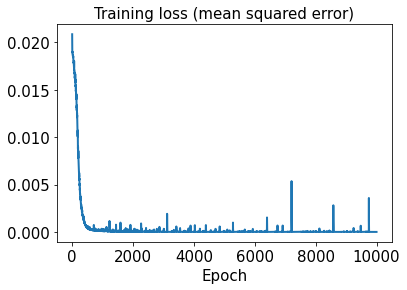

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

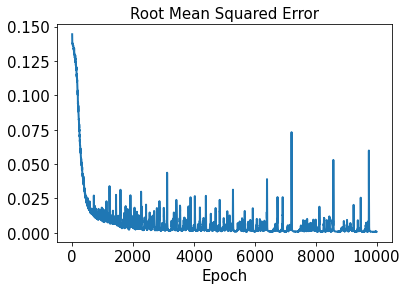

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

2.3916737e-05


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.0047642207


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

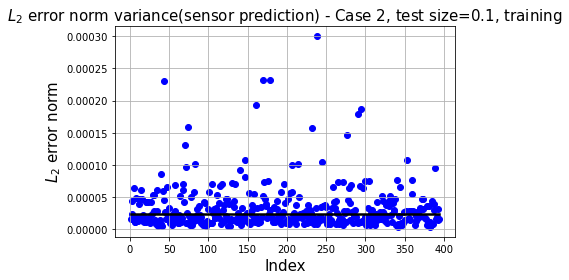

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

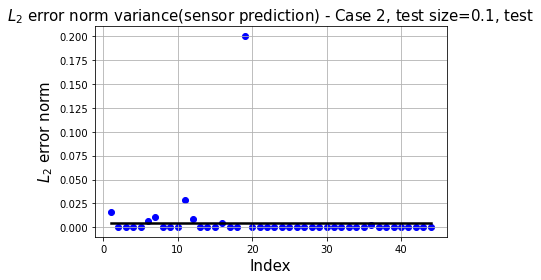

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [42]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [43]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0110 - rmse: 0.1040
Epoch 2/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0108 - rmse: 0.1032
Epoch 3/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0106 - rmse: 0.1020
Epoch 4/10000
13/13 [==============================] - 0s 7ms/step - loss: 0.0099 - rmse: 0.0988
Epoch 5/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0909
Epoch 6/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0852
Epoch 7/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0836
Epoch 8/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0828
Epoch 9/10000
13/13 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0813
Epoch 10/10000
13/13 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0789
Epoch 11/10000
13/13 [=======

13/13 [==============================] - 0s 5ms/step - loss: 3.7726e-04 - rmse: 0.0147
Epoch 165/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7329e-04 - rmse: 0.0146
Epoch 166/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6947e-04 - rmse: 0.0144
Epoch 167/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6591e-04 - rmse: 0.0143
Epoch 168/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6322e-04 - rmse: 0.0142
Epoch 169/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5924e-04 - rmse: 0.0141
Epoch 170/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5630e-04 - rmse: 0.0140
Epoch 171/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5348e-04 - rmse: 0.0139
Epoch 172/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5055e-04 - rmse: 0.0138
Epoch 173/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4848e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.9055e-04 - rmse: 0.0068
Epoch 323/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8965e-04 - rmse: 0.0068
Epoch 324/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8933e-04 - rmse: 0.0068
Epoch 325/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8909e-04 - rmse: 0.0068
Epoch 326/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8854e-04 - rmse: 0.0067
Epoch 327/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8819e-04 - rmse: 0.0067
Epoch 328/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8810e-04 - rmse: 0.0067
Epoch 329/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8739e-04 - rmse: 0.0067
Epoch 330/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8716e-04 - rmse: 0.0067
Epoch 331/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.8688e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.4289e-04 - rmse: 0.0045
Epoch 481/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4274e-04 - rmse: 0.0045
Epoch 482/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4243e-04 - rmse: 0.0045
Epoch 483/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4214e-04 - rmse: 0.0045
Epoch 484/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4184e-04 - rmse: 0.0045
Epoch 485/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4185e-04 - rmse: 0.0045
Epoch 486/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4232e-04 - rmse: 0.0045
Epoch 487/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4175e-04 - rmse: 0.0045
Epoch 488/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4120e-04 - rmse: 0.0044
Epoch 489/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.4118e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 1.1553e-04 - rmse: 0.0036
Epoch 639/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1543e-04 - rmse: 0.0036
Epoch 640/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1544e-04 - rmse: 0.0036
Epoch 641/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1530e-04 - rmse: 0.0036
Epoch 642/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1529e-04 - rmse: 0.0036
Epoch 643/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1500e-04 - rmse: 0.0036
Epoch 644/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1470e-04 - rmse: 0.0036
Epoch 645/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1441e-04 - rmse: 0.0035
Epoch 646/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1437e-04 - rmse: 0.0036
Epoch 647/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.1438e-04 -

13/13 [==============================] - 0s 5ms/step - loss: 9.6378e-05 - rmse: 0.0031
Epoch 797/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.6095e-05 - rmse: 0.0031
Epoch 798/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.6173e-05 - rmse: 0.0031
Epoch 799/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.5964e-05 - rmse: 0.0031
Epoch 800/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.5858e-05 - rmse: 0.0031
Epoch 801/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.5838e-05 - rmse: 0.0031
Epoch 802/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.5741e-05 - rmse: 0.0031
Epoch 803/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.5642e-05 - rmse: 0.0031
Epoch 804/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.5690e-05 - rmse: 0.0031
Epoch 805/10000
13/13 [==============================] - 0s 5ms/step - loss: 9.5507e-05 -

13/13 [==============================] - 0s 5ms/step - loss: 8.2295e-05 - rmse: 0.0028
Epoch 955/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.2108e-05 - rmse: 0.0028
Epoch 956/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.2118e-05 - rmse: 0.0028
Epoch 957/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.1985e-05 - rmse: 0.0028
Epoch 958/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.1850e-05 - rmse: 0.0028
Epoch 959/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.1857e-05 - rmse: 0.0028
Epoch 960/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.2018e-05 - rmse: 0.0028
Epoch 961/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.2350e-05 - rmse: 0.0029
Epoch 962/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.2059e-05 - rmse: 0.0029
Epoch 963/10000
13/13 [==============================] - 0s 5ms/step - loss: 8.2051e-05 -

13/13 [==============================] - 0s 5ms/step - loss: 7.1907e-05 - rmse: 0.0026
Epoch 1112/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.1912e-05 - rmse: 0.0026
Epoch 1113/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.1787e-05 - rmse: 0.0026
Epoch 1114/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.1665e-05 - rmse: 0.0026
Epoch 1115/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.1612e-05 - rmse: 0.0026
Epoch 1116/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.1554e-05 - rmse: 0.0026
Epoch 1117/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.1569e-05 - rmse: 0.0026
Epoch 1118/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.1464e-05 - rmse: 0.0026
Epoch 1119/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.1649e-05 - rmse: 0.0026
Epoch 1120/10000
13/13 [==============================] - 0s 5ms/step - loss: 7.1

13/13 [==============================] - 0s 5ms/step - loss: 6.3714e-05 - rmse: 0.0024
Epoch 1268/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.3769e-05 - rmse: 0.0024
Epoch 1269/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.3818e-05 - rmse: 0.0025
Epoch 1270/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.3670e-05 - rmse: 0.0024
Epoch 1271/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.3525e-05 - rmse: 0.0024
Epoch 1272/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.3407e-05 - rmse: 0.0024
Epoch 1273/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.3453e-05 - rmse: 0.0024
Epoch 1274/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.3647e-05 - rmse: 0.0025
Epoch 1275/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.3798e-05 - rmse: 0.0025
Epoch 1276/10000
13/13 [==============================] - 0s 5ms/step - loss: 6.3

13/13 [==============================] - 0s 5ms/step - loss: 5.8107e-05 - rmse: 0.0024
Epoch 1424/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.7948e-05 - rmse: 0.0024
Epoch 1425/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.7888e-05 - rmse: 0.0024
Epoch 1426/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.7800e-05 - rmse: 0.0024
Epoch 1427/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.7562e-05 - rmse: 0.0024
Epoch 1428/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.7345e-05 - rmse: 0.0023
Epoch 1429/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.7117e-05 - rmse: 0.0023
Epoch 1430/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.7080e-05 - rmse: 0.0023
Epoch 1431/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.7111e-05 - rmse: 0.0023
Epoch 1432/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.7

13/13 [==============================] - 0s 5ms/step - loss: 5.2513e-05 - rmse: 0.0022
Epoch 1580/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2571e-05 - rmse: 0.0022
Epoch 1581/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2475e-05 - rmse: 0.0022
Epoch 1582/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2680e-05 - rmse: 0.0023
Epoch 1583/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.3014e-05 - rmse: 0.0024
Epoch 1584/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2847e-05 - rmse: 0.0023
Epoch 1585/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2478e-05 - rmse: 0.0022
Epoch 1586/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2395e-05 - rmse: 0.0022
Epoch 1587/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2202e-05 - rmse: 0.0022
Epoch 1588/10000
13/13 [==============================] - 0s 5ms/step - loss: 5.2

13/13 [==============================] - 0s 5ms/step - loss: 4.8587e-05 - rmse: 0.0022
Epoch 1736/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8419e-05 - rmse: 0.0021
Epoch 1737/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8550e-05 - rmse: 0.0022
Epoch 1738/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8334e-05 - rmse: 0.0021
Epoch 1739/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8358e-05 - rmse: 0.0021
Epoch 1740/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8303e-05 - rmse: 0.0021
Epoch 1741/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8527e-05 - rmse: 0.0022
Epoch 1742/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8525e-05 - rmse: 0.0022
Epoch 1743/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8406e-05 - rmse: 0.0022
Epoch 1744/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.8

13/13 [==============================] - 0s 5ms/step - loss: 4.5439e-05 - rmse: 0.0021
Epoch 1892/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5614e-05 - rmse: 0.0022
Epoch 1893/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5449e-05 - rmse: 0.0022
Epoch 1894/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5526e-05 - rmse: 0.0022
Epoch 1895/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5234e-05 - rmse: 0.0021
Epoch 1896/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5006e-05 - rmse: 0.0021
Epoch 1897/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4909e-05 - rmse: 0.0020
Epoch 1898/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5024e-05 - rmse: 0.0021
Epoch 1899/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.5021e-05 - rmse: 0.0021
Epoch 1900/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.4

13/13 [==============================] - 0s 5ms/step - loss: 4.2337e-05 - rmse: 0.0020
Epoch 2048/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2230e-05 - rmse: 0.0020
Epoch 2049/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2603e-05 - rmse: 0.0021
Epoch 2050/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2542e-05 - rmse: 0.0021
Epoch 2051/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2395e-05 - rmse: 0.0020
Epoch 2052/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2431e-05 - rmse: 0.0020
Epoch 2053/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2447e-05 - rmse: 0.0021
Epoch 2054/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2335e-05 - rmse: 0.0020
Epoch 2055/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2239e-05 - rmse: 0.0020
Epoch 2056/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.2

13/13 [==============================] - 0s 5ms/step - loss: 3.9903e-05 - rmse: 0.0019
Epoch 2204/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9922e-05 - rmse: 0.0019
Epoch 2205/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9909e-05 - rmse: 0.0019
Epoch 2206/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0666e-05 - rmse: 0.0021
Epoch 2207/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0304e-05 - rmse: 0.0020
Epoch 2208/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9945e-05 - rmse: 0.0019
Epoch 2209/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9888e-05 - rmse: 0.0019
Epoch 2210/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0038e-05 - rmse: 0.0020
Epoch 2211/10000
13/13 [==============================] - 0s 5ms/step - loss: 4.0040e-05 - rmse: 0.0020
Epoch 2212/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.9

13/13 [==============================] - 0s 5ms/step - loss: 3.8577e-05 - rmse: 0.0020
Epoch 2360/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8374e-05 - rmse: 0.0020
Epoch 2361/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8375e-05 - rmse: 0.0020
Epoch 2362/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8063e-05 - rmse: 0.0019
Epoch 2363/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.7958e-05 - rmse: 0.0019
Epoch 2364/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8077e-05 - rmse: 0.0019
Epoch 2365/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8044e-05 - rmse: 0.0019
Epoch 2366/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8423e-05 - rmse: 0.0020
Epoch 2367/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8731e-05 - rmse: 0.0021
Epoch 2368/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.8

13/13 [==============================] - 0s 5ms/step - loss: 3.6358e-05 - rmse: 0.0018
Epoch 2516/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6374e-05 - rmse: 0.0019
Epoch 2517/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6347e-05 - rmse: 0.0019
Epoch 2518/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6361e-05 - rmse: 0.0019
Epoch 2519/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6423e-05 - rmse: 0.0019
Epoch 2520/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6293e-05 - rmse: 0.0018
Epoch 2521/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6346e-05 - rmse: 0.0019
Epoch 2522/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6198e-05 - rmse: 0.0018
Epoch 2523/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6392e-05 - rmse: 0.0019
Epoch 2524/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.6

13/13 [==============================] - 0s 5ms/step - loss: 3.4794e-05 - rmse: 0.0018
Epoch 2672/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4801e-05 - rmse: 0.0018
Epoch 2673/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4813e-05 - rmse: 0.0018
Epoch 2674/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5056e-05 - rmse: 0.0019
Epoch 2675/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5025e-05 - rmse: 0.0018
Epoch 2676/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5010e-05 - rmse: 0.0018
Epoch 2677/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4880e-05 - rmse: 0.0018
Epoch 2678/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4886e-05 - rmse: 0.0018
Epoch 2679/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.4857e-05 - rmse: 0.0018
Epoch 2680/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.5

13/13 [==============================] - 0s 5ms/step - loss: 3.3814e-05 - rmse: 0.0018
Epoch 2828/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3775e-05 - rmse: 0.0018
Epoch 2829/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3777e-05 - rmse: 0.0018
Epoch 2830/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3631e-05 - rmse: 0.0018
Epoch 2831/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3693e-05 - rmse: 0.0018
Epoch 2832/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3630e-05 - rmse: 0.0018
Epoch 2833/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3697e-05 - rmse: 0.0018
Epoch 2834/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3674e-05 - rmse: 0.0018
Epoch 2835/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3519e-05 - rmse: 0.0017
Epoch 2836/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3

13/13 [==============================] - 0s 5ms/step - loss: 3.2542e-05 - rmse: 0.0017
Epoch 2984/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2678e-05 - rmse: 0.0018
Epoch 2985/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2710e-05 - rmse: 0.0018
Epoch 2986/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2724e-05 - rmse: 0.0018
Epoch 2987/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2599e-05 - rmse: 0.0018
Epoch 2988/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2814e-05 - rmse: 0.0018
Epoch 2989/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3004e-05 - rmse: 0.0019
Epoch 2990/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2783e-05 - rmse: 0.0018
Epoch 2991/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.2787e-05 - rmse: 0.0018
Epoch 2992/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.3

13/13 [==============================] - 0s 5ms/step - loss: 3.1686e-05 - rmse: 0.0017
Epoch 3140/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1760e-05 - rmse: 0.0018
Epoch 3141/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1682e-05 - rmse: 0.0017
Epoch 3142/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1626e-05 - rmse: 0.0017
Epoch 3143/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1550e-05 - rmse: 0.0017
Epoch 3144/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1720e-05 - rmse: 0.0018
Epoch 3145/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1914e-05 - rmse: 0.0018
Epoch 3146/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1726e-05 - rmse: 0.0018
Epoch 3147/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1774e-05 - rmse: 0.0018
Epoch 3148/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1

13/13 [==============================] - 0s 5ms/step - loss: 3.0947e-05 - rmse: 0.0018
Epoch 3296/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0724e-05 - rmse: 0.0017
Epoch 3297/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0669e-05 - rmse: 0.0017
Epoch 3298/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0680e-05 - rmse: 0.0017
Epoch 3299/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0869e-05 - rmse: 0.0017
Epoch 3300/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0767e-05 - rmse: 0.0017
Epoch 3301/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0834e-05 - rmse: 0.0017
Epoch 3302/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0689e-05 - rmse: 0.0017
Epoch 3303/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0750e-05 - rmse: 0.0017
Epoch 3304/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0

13/13 [==============================] - 0s 5ms/step - loss: 3.0565e-05 - rmse: 0.0018
Epoch 3452/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0407e-05 - rmse: 0.0018
Epoch 3453/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0343e-05 - rmse: 0.0018
Epoch 3454/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0430e-05 - rmse: 0.0018
Epoch 3455/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.1043e-05 - rmse: 0.0020
Epoch 3456/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0415e-05 - rmse: 0.0018
Epoch 3457/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0062e-05 - rmse: 0.0017
Epoch 3458/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0010e-05 - rmse: 0.0017
Epoch 3459/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9972e-05 - rmse: 0.0017
Epoch 3460/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.9401e-05 - rmse: 0.0017
Epoch 3608/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9184e-05 - rmse: 0.0016
Epoch 3609/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9286e-05 - rmse: 0.0016
Epoch 3610/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9333e-05 - rmse: 0.0017
Epoch 3611/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9376e-05 - rmse: 0.0017
Epoch 3612/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9892e-05 - rmse: 0.0018
Epoch 3613/10000
13/13 [==============================] - 0s 5ms/step - loss: 3.0020e-05 - rmse: 0.0019
Epoch 3614/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9756e-05 - rmse: 0.0018
Epoch 3615/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9466e-05 - rmse: 0.0017
Epoch 3616/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.9177e-05 - rmse: 0.0018
Epoch 3764/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9206e-05 - rmse: 0.0018
Epoch 3765/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9334e-05 - rmse: 0.0018
Epoch 3766/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9015e-05 - rmse: 0.0017
Epoch 3767/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8947e-05 - rmse: 0.0017
Epoch 3768/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8957e-05 - rmse: 0.0017
Epoch 3769/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9390e-05 - rmse: 0.0018
Epoch 3770/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9134e-05 - rmse: 0.0018
Epoch 3771/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8979e-05 - rmse: 0.0017
Epoch 3772/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.9

13/13 [==============================] - 0s 5ms/step - loss: 2.8140e-05 - rmse: 0.0016
Epoch 3920/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8224e-05 - rmse: 0.0016
Epoch 3921/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8328e-05 - rmse: 0.0017
Epoch 3922/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8459e-05 - rmse: 0.0017
Epoch 3923/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8270e-05 - rmse: 0.0017
Epoch 3924/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8260e-05 - rmse: 0.0017
Epoch 3925/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7985e-05 - rmse: 0.0016
Epoch 3926/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8078e-05 - rmse: 0.0016
Epoch 3927/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8067e-05 - rmse: 0.0016
Epoch 3928/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.8032e-05 - rmse: 0.0017
Epoch 4076/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.8103e-05 - rmse: 0.0017
Epoch 4077/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7876e-05 - rmse: 0.0017
Epoch 4078/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7651e-05 - rmse: 0.0016
Epoch 4079/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7575e-05 - rmse: 0.0016
Epoch 4080/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7551e-05 - rmse: 0.0016
Epoch 4081/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7468e-05 - rmse: 0.0016
Epoch 4082/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7494e-05 - rmse: 0.0016
Epoch 4083/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7413e-05 - rmse: 0.0015
Epoch 4084/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.7240e-05 - rmse: 0.0016
Epoch 4232/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7216e-05 - rmse: 0.0016
Epoch 4233/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7076e-05 - rmse: 0.0016
Epoch 4234/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7100e-05 - rmse: 0.0016
Epoch 4235/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7198e-05 - rmse: 0.0016
Epoch 4236/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7033e-05 - rmse: 0.0016
Epoch 4237/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7466e-05 - rmse: 0.0017
Epoch 4238/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7498e-05 - rmse: 0.0017
Epoch 4239/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7307e-05 - rmse: 0.0016
Epoch 4240/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.7

13/13 [==============================] - 0s 5ms/step - loss: 2.6683e-05 - rmse: 0.0016
Epoch 4388/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6611e-05 - rmse: 0.0015
Epoch 4389/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6613e-05 - rmse: 0.0015
Epoch 4390/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6639e-05 - rmse: 0.0015
Epoch 4391/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6591e-05 - rmse: 0.0015
Epoch 4392/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6535e-05 - rmse: 0.0015
Epoch 4393/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6636e-05 - rmse: 0.0016
Epoch 4394/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6528e-05 - rmse: 0.0015
Epoch 4395/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6563e-05 - rmse: 0.0015
Epoch 4396/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.6618e-05 - rmse: 0.0017
Epoch 4544/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6633e-05 - rmse: 0.0017
Epoch 4545/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6575e-05 - rmse: 0.0016
Epoch 4546/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6485e-05 - rmse: 0.0016
Epoch 4547/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6675e-05 - rmse: 0.0017
Epoch 4548/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6650e-05 - rmse: 0.0017
Epoch 4549/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6585e-05 - rmse: 0.0016
Epoch 4550/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6598e-05 - rmse: 0.0017
Epoch 4551/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6819e-05 - rmse: 0.0017
Epoch 4552/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.6775e-05 - rmse: 0.0018
Epoch 4700/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6395e-05 - rmse: 0.0017
Epoch 4701/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6348e-05 - rmse: 0.0017
Epoch 4702/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6323e-05 - rmse: 0.0017
Epoch 4703/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6147e-05 - rmse: 0.0016
Epoch 4704/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6176e-05 - rmse: 0.0016
Epoch 4705/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6099e-05 - rmse: 0.0016
Epoch 4706/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6209e-05 - rmse: 0.0016
Epoch 4707/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6493e-05 - rmse: 0.0017
Epoch 4708/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6

13/13 [==============================] - 0s 5ms/step - loss: 2.5708e-05 - rmse: 0.0016
Epoch 4856/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5766e-05 - rmse: 0.0016
Epoch 4857/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5932e-05 - rmse: 0.0016
Epoch 4858/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5944e-05 - rmse: 0.0016
Epoch 4859/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5809e-05 - rmse: 0.0016
Epoch 4860/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5812e-05 - rmse: 0.0016
Epoch 4861/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5690e-05 - rmse: 0.0016
Epoch 4862/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5662e-05 - rmse: 0.0016
Epoch 4863/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5649e-05 - rmse: 0.0016
Epoch 4864/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5148e-05 - rmse: 0.0015
Epoch 5012/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5174e-05 - rmse: 0.0015
Epoch 5013/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5425e-05 - rmse: 0.0016
Epoch 5014/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5526e-05 - rmse: 0.0016
Epoch 5015/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5398e-05 - rmse: 0.0016
Epoch 5016/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5277e-05 - rmse: 0.0015
Epoch 5017/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5281e-05 - rmse: 0.0015
Epoch 5018/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5109e-05 - rmse: 0.0015
Epoch 5019/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5132e-05 - rmse: 0.0015
Epoch 5020/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.5073e-05 - rmse: 0.0015
Epoch 5168/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5402e-05 - rmse: 0.0016
Epoch 5169/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5232e-05 - rmse: 0.0016
Epoch 5170/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5437e-05 - rmse: 0.0017
Epoch 5171/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4994e-05 - rmse: 0.0015
Epoch 5172/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5296e-05 - rmse: 0.0016
Epoch 5173/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5626e-05 - rmse: 0.0017
Epoch 5174/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5898e-05 - rmse: 0.0018
Epoch 5175/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.6558e-05 - rmse: 0.0020
Epoch 5176/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.5

13/13 [==============================] - 0s 5ms/step - loss: 2.4713e-05 - rmse: 0.0015
Epoch 5324/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4750e-05 - rmse: 0.0015
Epoch 5325/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4647e-05 - rmse: 0.0015
Epoch 5326/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4857e-05 - rmse: 0.0016
Epoch 5327/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4773e-05 - rmse: 0.0015
Epoch 5328/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4690e-05 - rmse: 0.0015
Epoch 5329/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4574e-05 - rmse: 0.0015
Epoch 5330/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4600e-05 - rmse: 0.0015
Epoch 5331/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4566e-05 - rmse: 0.0015
Epoch 5332/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4407e-05 - rmse: 0.0015
Epoch 5480/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4485e-05 - rmse: 0.0015
Epoch 5481/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4750e-05 - rmse: 0.0016
Epoch 5482/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4800e-05 - rmse: 0.0016
Epoch 5483/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4562e-05 - rmse: 0.0015
Epoch 5484/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4431e-05 - rmse: 0.0015
Epoch 5485/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4290e-05 - rmse: 0.0015
Epoch 5486/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4281e-05 - rmse: 0.0014
Epoch 5487/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4418e-05 - rmse: 0.0015
Epoch 5488/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.4049e-05 - rmse: 0.0014
Epoch 5636/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4055e-05 - rmse: 0.0014
Epoch 5637/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4089e-05 - rmse: 0.0015
Epoch 5638/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4030e-05 - rmse: 0.0014
Epoch 5639/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3996e-05 - rmse: 0.0014
Epoch 5640/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4105e-05 - rmse: 0.0015
Epoch 5641/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4225e-05 - rmse: 0.0015
Epoch 5642/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4273e-05 - rmse: 0.0015
Epoch 5643/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4301e-05 - rmse: 0.0015
Epoch 5644/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4

13/13 [==============================] - 0s 5ms/step - loss: 2.3974e-05 - rmse: 0.0015
Epoch 5792/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4116e-05 - rmse: 0.0015
Epoch 5793/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3978e-05 - rmse: 0.0015
Epoch 5794/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3915e-05 - rmse: 0.0015
Epoch 5795/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3969e-05 - rmse: 0.0015
Epoch 5796/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3972e-05 - rmse: 0.0015
Epoch 5797/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3941e-05 - rmse: 0.0015
Epoch 5798/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3908e-05 - rmse: 0.0015
Epoch 5799/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3817e-05 - rmse: 0.0014
Epoch 5800/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3827e-05 - rmse: 0.0015
Epoch 5948/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3639e-05 - rmse: 0.0014
Epoch 5949/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3720e-05 - rmse: 0.0015
Epoch 5950/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3661e-05 - rmse: 0.0015
Epoch 5951/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3799e-05 - rmse: 0.0015
Epoch 5952/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3937e-05 - rmse: 0.0015
Epoch 5953/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3916e-05 - rmse: 0.0015
Epoch 5954/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3813e-05 - rmse: 0.0015
Epoch 5955/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3738e-05 - rmse: 0.0015
Epoch 5956/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3664e-05 - rmse: 0.0015
Epoch 6104/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3418e-05 - rmse: 0.0014
Epoch 6105/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3411e-05 - rmse: 0.0014
Epoch 6106/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3449e-05 - rmse: 0.0014
Epoch 6107/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3362e-05 - rmse: 0.0014
Epoch 6108/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3423e-05 - rmse: 0.0014
Epoch 6109/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3480e-05 - rmse: 0.0015
Epoch 6110/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3289e-05 - rmse: 0.0014
Epoch 6111/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3414e-05 - rmse: 0.0014
Epoch 6112/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3255e-05 - rmse: 0.0014
Epoch 6260/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3500e-05 - rmse: 0.0015
Epoch 6261/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3261e-05 - rmse: 0.0014
Epoch 6262/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3201e-05 - rmse: 0.0014
Epoch 6263/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3565e-05 - rmse: 0.0015
Epoch 6264/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3450e-05 - rmse: 0.0015
Epoch 6265/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3290e-05 - rmse: 0.0015
Epoch 6266/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3235e-05 - rmse: 0.0014
Epoch 6267/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3351e-05 - rmse: 0.0015
Epoch 6268/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3410e-05 - rmse: 0.0016
Epoch 6416/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3099e-05 - rmse: 0.0014
Epoch 6417/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2944e-05 - rmse: 0.0014
Epoch 6418/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2877e-05 - rmse: 0.0014
Epoch 6419/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2946e-05 - rmse: 0.0014
Epoch 6420/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3015e-05 - rmse: 0.0014
Epoch 6421/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3112e-05 - rmse: 0.0015
Epoch 6422/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3157e-05 - rmse: 0.0015
Epoch 6423/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3327e-05 - rmse: 0.0015
Epoch 6424/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.3202e-05 - rmse: 0.0015
Epoch 6572/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2846e-05 - rmse: 0.0014
Epoch 6573/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2789e-05 - rmse: 0.0014
Epoch 6574/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2986e-05 - rmse: 0.0015
Epoch 6575/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3204e-05 - rmse: 0.0015
Epoch 6576/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3112e-05 - rmse: 0.0015
Epoch 6577/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3001e-05 - rmse: 0.0015
Epoch 6578/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3042e-05 - rmse: 0.0015
Epoch 6579/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2831e-05 - rmse: 0.0014
Epoch 6580/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.3083e-05 - rmse: 0.0016
Epoch 6728/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2897e-05 - rmse: 0.0015
Epoch 6729/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2955e-05 - rmse: 0.0015
Epoch 6730/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3283e-05 - rmse: 0.0016
Epoch 6731/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3243e-05 - rmse: 0.0016
Epoch 6732/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3199e-05 - rmse: 0.0016
Epoch 6733/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3117e-05 - rmse: 0.0016
Epoch 6734/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2802e-05 - rmse: 0.0015
Epoch 6735/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2854e-05 - rmse: 0.0015
Epoch 6736/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2639e-05 - rmse: 0.0015
Epoch 6884/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2774e-05 - rmse: 0.0015
Epoch 6885/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2859e-05 - rmse: 0.0015
Epoch 6886/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2782e-05 - rmse: 0.0015
Epoch 6887/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2616e-05 - rmse: 0.0015
Epoch 6888/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2496e-05 - rmse: 0.0014
Epoch 6889/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2530e-05 - rmse: 0.0014
Epoch 6890/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2642e-05 - rmse: 0.0015
Epoch 6891/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2497e-05 - rmse: 0.0014
Epoch 6892/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2631e-05 - rmse: 0.0015
Epoch 7040/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2387e-05 - rmse: 0.0014
Epoch 7041/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2466e-05 - rmse: 0.0014
Epoch 7042/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2461e-05 - rmse: 0.0014
Epoch 7043/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2799e-05 - rmse: 0.0016
Epoch 7044/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2854e-05 - rmse: 0.0016
Epoch 7045/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2931e-05 - rmse: 0.0016
Epoch 7046/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2513e-05 - rmse: 0.0015
Epoch 7047/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2639e-05 - rmse: 0.0015
Epoch 7048/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.2891e-05 - rmse: 0.0016
Epoch 7196/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2516e-05 - rmse: 0.0015
Epoch 7197/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2235e-05 - rmse: 0.0014
Epoch 7198/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2150e-05 - rmse: 0.0014
Epoch 7199/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2146e-05 - rmse: 0.0014
Epoch 7200/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2107e-05 - rmse: 0.0014
Epoch 7201/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2002e-05 - rmse: 0.0013
Epoch 7202/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2005e-05 - rmse: 0.0013
Epoch 7203/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2124e-05 - rmse: 0.0014
Epoch 7204/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.1991e-05 - rmse: 0.0014
Epoch 7352/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1960e-05 - rmse: 0.0014
Epoch 7353/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1954e-05 - rmse: 0.0014
Epoch 7354/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1943e-05 - rmse: 0.0014
Epoch 7355/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1888e-05 - rmse: 0.0013
Epoch 7356/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1922e-05 - rmse: 0.0014
Epoch 7357/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2164e-05 - rmse: 0.0014
Epoch 7358/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2341e-05 - rmse: 0.0015
Epoch 7359/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2584e-05 - rmse: 0.0016
Epoch 7360/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3

13/13 [==============================] - 0s 5ms/step - loss: 2.1923e-05 - rmse: 0.0014
Epoch 7508/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1825e-05 - rmse: 0.0014
Epoch 7509/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1646e-05 - rmse: 0.0013
Epoch 7510/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1781e-05 - rmse: 0.0014
Epoch 7511/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1784e-05 - rmse: 0.0014
Epoch 7512/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1933e-05 - rmse: 0.0014
Epoch 7513/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1935e-05 - rmse: 0.0014
Epoch 7514/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1860e-05 - rmse: 0.0014
Epoch 7515/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1875e-05 - rmse: 0.0014
Epoch 7516/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.2433e-05 - rmse: 0.0016
Epoch 7664/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2254e-05 - rmse: 0.0016
Epoch 7665/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2229e-05 - rmse: 0.0015
Epoch 7666/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2045e-05 - rmse: 0.0015
Epoch 7667/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1794e-05 - rmse: 0.0014
Epoch 7668/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1946e-05 - rmse: 0.0015
Epoch 7669/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1675e-05 - rmse: 0.0014
Epoch 7670/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2090e-05 - rmse: 0.0015
Epoch 7671/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2618e-05 - rmse: 0.0017
Epoch 7672/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2

13/13 [==============================] - 0s 5ms/step - loss: 2.1597e-05 - rmse: 0.0014
Epoch 7820/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1540e-05 - rmse: 0.0014
Epoch 7821/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1490e-05 - rmse: 0.0013
Epoch 7822/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1391e-05 - rmse: 0.0013
Epoch 7823/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1442e-05 - rmse: 0.0013
Epoch 7824/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1471e-05 - rmse: 0.0013
Epoch 7825/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1471e-05 - rmse: 0.0013
Epoch 7826/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1474e-05 - rmse: 0.0013
Epoch 7827/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1403e-05 - rmse: 0.0013
Epoch 7828/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1279e-05 - rmse: 0.0013
Epoch 7976/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1292e-05 - rmse: 0.0013
Epoch 7977/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1374e-05 - rmse: 0.0013
Epoch 7978/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1276e-05 - rmse: 0.0013
Epoch 7979/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1227e-05 - rmse: 0.0013
Epoch 7980/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1239e-05 - rmse: 0.0013
Epoch 7981/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1276e-05 - rmse: 0.0013
Epoch 7982/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1477e-05 - rmse: 0.0014
Epoch 7983/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1437e-05 - rmse: 0.0014
Epoch 7984/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1323e-05 - rmse: 0.0014
Epoch 8132/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1391e-05 - rmse: 0.0014
Epoch 8133/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1305e-05 - rmse: 0.0014
Epoch 8134/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1235e-05 - rmse: 0.0013
Epoch 8135/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1157e-05 - rmse: 0.0013
Epoch 8136/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1102e-05 - rmse: 0.0013
Epoch 8137/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1186e-05 - rmse: 0.0013
Epoch 8138/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1296e-05 - rmse: 0.0014
Epoch 8139/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1427e-05 - rmse: 0.0014
Epoch 8140/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1746e-05 - rmse: 0.0015
Epoch 8288/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2393e-05 - rmse: 0.0017
Epoch 8289/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2684e-05 - rmse: 0.0018
Epoch 8290/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3052e-05 - rmse: 0.0019
Epoch 8291/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.4566e-05 - rmse: 0.0023
Epoch 8292/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3811e-05 - rmse: 0.0021
Epoch 8293/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.3128e-05 - rmse: 0.0019
Epoch 8294/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2585e-05 - rmse: 0.0018
Epoch 8295/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2250e-05 - rmse: 0.0017
Epoch 8296/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1194e-05 - rmse: 0.0014
Epoch 8444/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1331e-05 - rmse: 0.0014
Epoch 8445/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1389e-05 - rmse: 0.0015
Epoch 8446/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1464e-05 - rmse: 0.0015
Epoch 8447/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1317e-05 - rmse: 0.0014
Epoch 8448/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1304e-05 - rmse: 0.0014
Epoch 8449/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1181e-05 - rmse: 0.0014
Epoch 8450/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0893e-05 - rmse: 0.0013
Epoch 8451/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1129e-05 - rmse: 0.0014
Epoch 8452/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.1054e-05 - rmse: 0.0014
Epoch 8600/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1089e-05 - rmse: 0.0014
Epoch 8601/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1087e-05 - rmse: 0.0014
Epoch 8602/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1025e-05 - rmse: 0.0014
Epoch 8603/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1040e-05 - rmse: 0.0014
Epoch 8604/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1007e-05 - rmse: 0.0014
Epoch 8605/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0906e-05 - rmse: 0.0013
Epoch 8606/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1031e-05 - rmse: 0.0014
Epoch 8607/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1052e-05 - rmse: 0.0014
Epoch 8608/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.0809e-05 - rmse: 0.0013
Epoch 8756/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0883e-05 - rmse: 0.0014
Epoch 8757/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1039e-05 - rmse: 0.0014
Epoch 8758/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1309e-05 - rmse: 0.0015
Epoch 8759/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1030e-05 - rmse: 0.0014
Epoch 8760/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0908e-05 - rmse: 0.0014
Epoch 8761/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1031e-05 - rmse: 0.0014
Epoch 8762/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0925e-05 - rmse: 0.0014
Epoch 8763/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1231e-05 - rmse: 0.0015
Epoch 8764/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1

13/13 [==============================] - 0s 5ms/step - loss: 2.2135e-05 - rmse: 0.0018
Epoch 8912/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.2633e-05 - rmse: 0.0019
Epoch 8913/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1796e-05 - rmse: 0.0017
Epoch 8914/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1013e-05 - rmse: 0.0014
Epoch 8915/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1067e-05 - rmse: 0.0015
Epoch 8916/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0976e-05 - rmse: 0.0014
Epoch 8917/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0800e-05 - rmse: 0.0014
Epoch 8918/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0690e-05 - rmse: 0.0013
Epoch 8919/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0913e-05 - rmse: 0.0014
Epoch 8920/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0456e-05 - rmse: 0.0013
Epoch 9068/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0380e-05 - rmse: 0.0012
Epoch 9069/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0372e-05 - rmse: 0.0012
Epoch 9070/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0382e-05 - rmse: 0.0012
Epoch 9071/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0592e-05 - rmse: 0.0013
Epoch 9072/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0679e-05 - rmse: 0.0014
Epoch 9073/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0711e-05 - rmse: 0.0014
Epoch 9074/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0844e-05 - rmse: 0.0014
Epoch 9075/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0886e-05 - rmse: 0.0014
Epoch 9076/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.1123e-05 - rmse: 0.0015
Epoch 9224/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1055e-05 - rmse: 0.0015
Epoch 9225/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0947e-05 - rmse: 0.0015
Epoch 9226/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0764e-05 - rmse: 0.0014
Epoch 9227/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0855e-05 - rmse: 0.0015
Epoch 9228/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0920e-05 - rmse: 0.0015
Epoch 9229/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0703e-05 - rmse: 0.0014
Epoch 9230/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0657e-05 - rmse: 0.0014
Epoch 9231/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0562e-05 - rmse: 0.0013
Epoch 9232/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0240e-05 - rmse: 0.0013
Epoch 9380/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0159e-05 - rmse: 0.0012
Epoch 9381/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0180e-05 - rmse: 0.0012
Epoch 9382/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0225e-05 - rmse: 0.0013
Epoch 9383/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0236e-05 - rmse: 0.0013
Epoch 9384/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0275e-05 - rmse: 0.0013
Epoch 9385/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0478e-05 - rmse: 0.0014
Epoch 9386/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0372e-05 - rmse: 0.0013
Epoch 9387/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0375e-05 - rmse: 0.0013
Epoch 9388/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.1586e-05 - rmse: 0.0017
Epoch 9536/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0833e-05 - rmse: 0.0015
Epoch 9537/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0443e-05 - rmse: 0.0014
Epoch 9538/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0300e-05 - rmse: 0.0013
Epoch 9539/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0284e-05 - rmse: 0.0013
Epoch 9540/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0306e-05 - rmse: 0.0013
Epoch 9541/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0582e-05 - rmse: 0.0014
Epoch 9542/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0861e-05 - rmse: 0.0015
Epoch 9543/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0565e-05 - rmse: 0.0014
Epoch 9544/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.2327e-05 - rmse: 0.0020
Epoch 9692/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1935e-05 - rmse: 0.0019
Epoch 9693/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.1129e-05 - rmse: 0.0016
Epoch 9694/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0888e-05 - rmse: 0.0015
Epoch 9695/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0656e-05 - rmse: 0.0015
Epoch 9696/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0396e-05 - rmse: 0.0014
Epoch 9697/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0365e-05 - rmse: 0.0014
Epoch 9698/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0492e-05 - rmse: 0.0014
Epoch 9699/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0180e-05 - rmse: 0.0013
Epoch 9700/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0

13/13 [==============================] - 0s 5ms/step - loss: 2.0133e-05 - rmse: 0.0013
Epoch 9848/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0070e-05 - rmse: 0.0013
Epoch 9849/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9977e-05 - rmse: 0.0013
Epoch 9850/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9953e-05 - rmse: 0.0013
Epoch 9851/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9917e-05 - rmse: 0.0012
Epoch 9852/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9947e-05 - rmse: 0.0012
Epoch 9853/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9906e-05 - rmse: 0.0012
Epoch 9854/10000
13/13 [==============================] - 0s 5ms/step - loss: 2.0085e-05 - rmse: 0.0013
Epoch 9855/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9981e-05 - rmse: 0.0013
Epoch 9856/10000
13/13 [==============================] - 0s 5ms/step - loss: 1.9

In [45]:
time = end - start
print("Training time:", time)

Training time: 0:11:12.974320


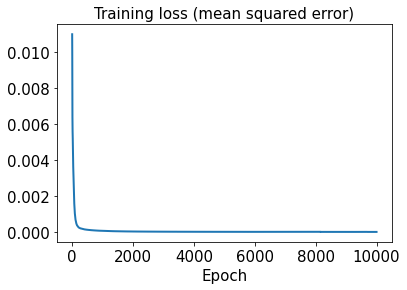

In [46]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

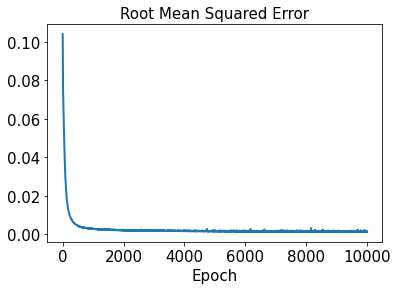

In [47]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 1ms/step - loss: 1.8318e-05 - rmse: 0.0000e+00


In [49]:
decoded_train = sd.predict(decoded_sensor_train)

In [50]:
decoded_test = sd.predict(decoded_sensor_test)

In [51]:
error_train_abs = np.abs(decoded_train - y_train)

In [52]:
error_test_abs = np.abs(decoded_test - y_test)

In [53]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00017914109


In [54]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.0093199685


In [55]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00013923191, 0.00013833989, 7.86348e-05, 0.00023073456, 0.00020436187, 0.00011857408, 9.333759e-05, 0.0001705557, 7.7077966e-05, 0.00011622348, 0.0005599949, 0.000175666, 8.726541e-05, 0.0002576524, 0.00017389651, 0.00014157074, 0.00012638405, 0.0001556578, 0.00013398979, 0.00010745337, 0.0001014493, 0.00013117322, 0.00021566129, 0.0019777147, 8.6874454e-05, 0.00018228254, 0.00016918141, 0.00010877515, 0.00014353699, 0.00011455492, 0.00019678393, 0.00017144586, 0.00014338388, 0.00016876015, 0.00013716631, 0.0001485916, 0.00018862159, 0.00014690017, 0.00011936814, 0.00014724296, 0.00014531096, 0.00017235956, 0.00014768734, 0.00033434978, 7.4969495e-05, 0.00010944261, 0.00021439118, 0.00021494007, 0.000103703474, 0.00017107418, 0.00014432882, 0.0001517933, 0.00011372092, 0.00014446957, 0.0003631133, 9.176438e-05, 0.00015277603, 0.00014291129, 0.00014405114, 0.00012475693, 0.00010671571, 0.000115112125, 0.0001109094, 0.0001380633, 0.00011954552, 0.00012584557, 0.0001561131, 0.000306501

In [56]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.016004486, 0.002030843, 0.00036960127, 0.00024848935, 0.0008975123, 0.023850625, 0.016596306, 0.00045662437, 0.00053842925, 0.0005573998, 0.08741713, 0.0036871242, 0.0005331147, 0.00043660885, 0.00018897206, 0.0020835944, 0.00038291982, 0.0003132263, 0.1703301, 0.00037034598, 0.000686466, 0.00023709644, 0.00052828755, 0.0002627485, 0.00048621435, 0.00055436377, 0.00050377956, 0.01033404, 0.000534409, 0.0008007346, 0.00081873976, 0.01464248, 0.00036223364, 0.0005921272, 0.0005245904, 0.0133088725, 0.00079309265, 0.0007122266, 0.0068656877, 0.00044549574, 0.00064908544, 0.0008081137, 0.0007842286, 0.0014778108]


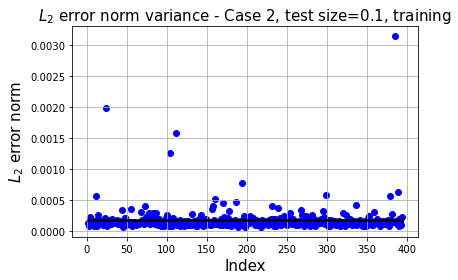

In [57]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

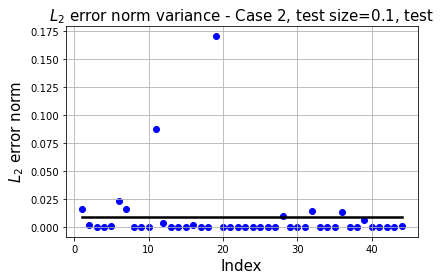

In [58]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

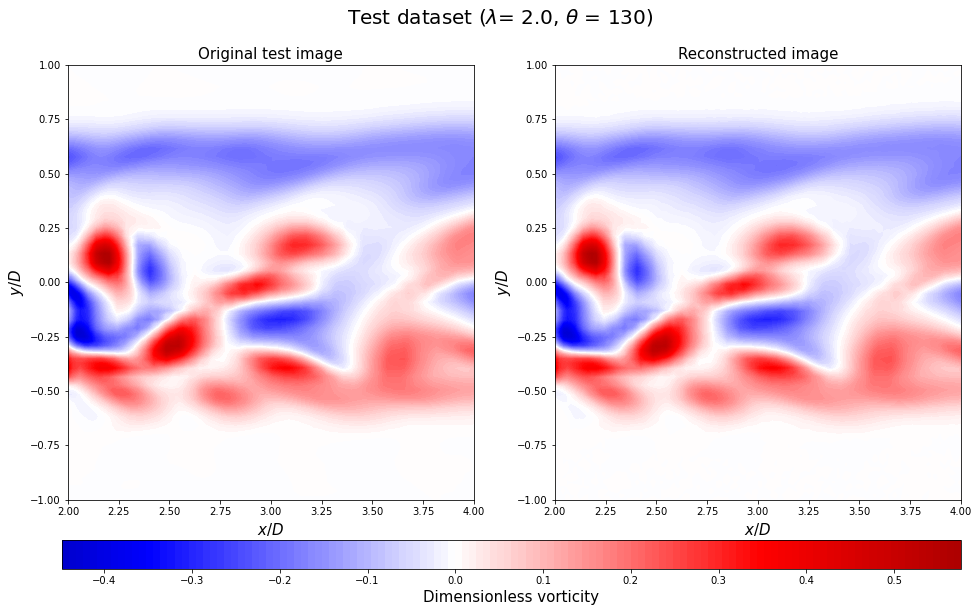

In [59]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

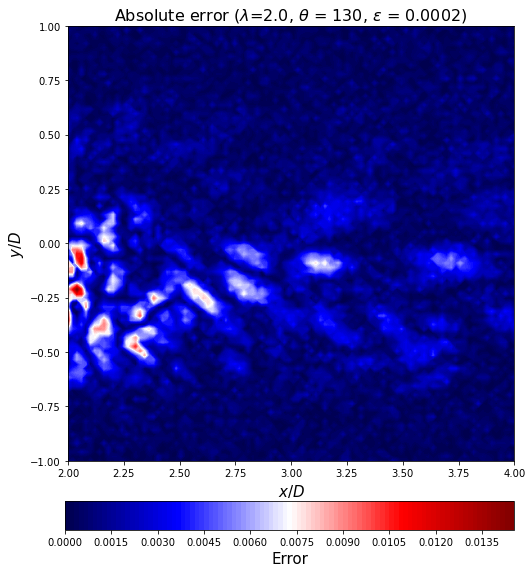

In [60]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()